<a href="https://colab.research.google.com/github/Megan-create/sharing-github/blob/main/Ai_Poetry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%204%20-%20Lesson%202%20-%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [ ]:
!wget --no-check-certificate \
http://www.gutenberg.org/files/63874/63874-0.txt \
    -O /tmp/scifi.txt

--2020-12-01 18:48:34--  http://www.gutenberg.org/files/63874/63874-0.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110347 (108K) [text/plain]
Saving to: ‘/tmp/scifi.txt’

/tmp/scifi.txt      100%[===================>] 107.76K   644KB/s    in 0.2s    

2020-12-01 18:48:34 (644 KB/s) - ‘/tmp/scifi.txt’ saved [110347/110347]



In [ ]:
tokenizer = Tokenizer()

data = open('/tmp/scifi.txt').read()

corpus = data.lower().split(".")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'the': 1, 'of': 2, 'and': 3, 'a': 4, 'to': 5, 'he': 6, 'his': 7, 'in': 8, 'was': 9, 'it': 10, 'you': 11, 'with': 12, 'sim': 13, 'this': 14, 'him': 15, 'at': 16, 'her': 17, 'not': 18, 'or': 19, 'from': 20, 'that': 21, 'i': 22, 'for': 23, 'gutenberg': 24, 'they': 25, 'project': 26, 'is': 27, 'on': 28, 'as': 29, 'if': 30, 'she': 31, 'had': 32, 'one': 33, 'be': 34, 'but': 35, 'there': 36, 'were': 37, 'their': 38, 'like': 39, 'them': 40, 'lyte': 41, 'by': 42, 'no': 43, 'we': 44, 'time': 45, 'are': 46, 'eyes': 47, 'life': 48, 'now': 49, 'an': 50, 'tm': 51, 'all': 52, 'said': 53, 'work': 54, 'will': 55, 'ship': 56, 'out': 57, 'into': 58, 'back': 59, 'days': 60, 'down': 61, 'then': 62, 'any': 63, 'up': 64, '1': 65, 'away': 66, 'have': 67, 'old': 68, 'so': 69, 'man': 70, 'people': 71, 'upon': 72, 'how': 73, 'over': 74, 'do': 75, 'go': 76, 'day': 77, 'would': 78, 'sun': 79, 'could': 80, 'works': 81, 'dark': 82, 'me': 83, 'its': 84, 'only': 85, 'live': 86, 'night': 87, 'father': 88, 'must': 89, 

In [ ]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['city'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
3197
2


KeyError: ignored

In [ ]:
print(xs[6])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0 1517   26   24  222    2    1  512]


In [ ]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0 1517   26   24  222    2    1]
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
print(tokenizer.word_index)

{'the': 1, 'of': 2, 'and': 3, 'a': 4, 'to': 5, 'he': 6, 'his': 7, 'in': 8, 'was': 9, 'it': 10, 'you': 11, 'with': 12, 'sim': 13, 'this': 14, 'him': 15, 'at': 16, 'her': 17, 'not': 18, 'or': 19, 'from': 20, 'that': 21, 'i': 22, 'for': 23, 'gutenberg': 24, 'they': 25, 'project': 26, 'is': 27, 'on': 28, 'as': 29, 'if': 30, 'she': 31, 'had': 32, 'one': 33, 'be': 34, 'but': 35, 'there': 36, 'were': 37, 'their': 38, 'like': 39, 'them': 40, 'lyte': 41, 'by': 42, 'no': 43, 'we': 44, 'time': 45, 'are': 46, 'eyes': 47, 'life': 48, 'now': 49, 'an': 50, 'tm': 51, 'all': 52, 'said': 53, 'work': 54, 'will': 55, 'ship': 56, 'out': 57, 'into': 58, 'back': 59, 'days': 60, 'down': 61, 'then': 62, 'any': 63, 'up': 64, '1': 65, 'away': 66, 'have': 67, 'old': 68, 'so': 69, 'man': 70, 'people': 71, 'upon': 72, 'how': 73, 'over': 74, 'do': 75, 'go': 76, 'day': 77, 'would': 78, 'sun': 79, 'could': 80, 'works': 81, 'dark': 82, 'me': 83, 'its': 84, 'only': 85, 'live': 86, 'night': 87, 'father': 88, 'must': 89, 

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


Epoch 1/100
542/542 [==============================] - 11s 21ms/step - loss: 6.7155 - accuracy: 0.0686
Epoch 2/100
542/542 [==============================] - 11s 21ms/step - loss: 5.7054 - accuracy: 0.1153
Epoch 3/100
542/542 [==============================] - 11s 21ms/step - loss: 4.9147 - accuracy: 0.1544
Epoch 4/100
542/542 [==============================] - 11s 21ms/step - loss: 4.1258 - accuracy: 0.2027
Epoch 5/100
542/542 [==============================] - 11s 21ms/step - loss: 3.3786 - accuracy: 0.2850
Epoch 6/100
542/542 [==============================] - 12s 21ms/step - loss: 2.8074 - accuracy: 0.3629
Epoch 7/100
542/542 [==============================] - 11s 21ms/step - loss: 2.3458 - accuracy: 0.4508
Epoch 8/100
542/542 [==============================] - 11s 21ms/step - loss: 2.0287 - accuracy: 0.5093
Epoch 9/100
542/542 [==============================] - 11s 21ms/step - loss: 1.7455 - accuracy: 0.5660
Epoch 10/100
542/542 [==============================] - 11s 21ms/step - l

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

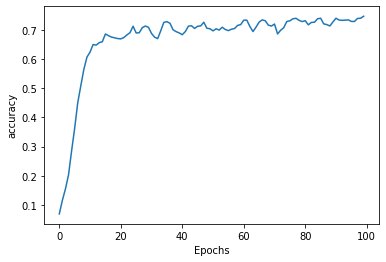

In [ ]:
plot_graphs(history, 'accuracy')


In [ ]:
import pprint as pprint # pretty print
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text) # pretty print 

I've got a bad feeling about this web site includes silence stood staring uselessly copying this new set of new fruits and stopping in his head now stood back here and at their feet space the husband to rise of him a particularly luscious red berry he was his mouth dried at the taste of the words were all that on the far mountain of the pathside she shifted never be much heat but enough to sustain life anyway unbelieving at her husband kept the other form belief again from the cliffs even red mouthed people where was all walks of life was the caves saw figure


AI Poetry Reflection

Megan Moffat

ID: 6969554

When increasing and/or decreasing the Bidirectional LTSM values can affect the data completely. As you increase the LTSM value the accuracy also increase’s as there is more data to work with, usually resulting in a better performance. When decreasing the LSTM value the results may not be as accurate as the size of your data set has lowered. Epochs can also come into play in the same way, by increasing/decreasing the number of epochs can influence the accuracy, as this cycle is what allows it to understand what patterns make sense. TensorFlow has many different activation and loss functions, for example, Mean Squared Error (MSE) and Binary Crossentrophy (BSE). MSE is used for regression tasks and BSE is used for the binary classification tasks to measure the loss in your data. Softsign and Softplus are different activation functions as well. Even though I did not come across these in my assignment they are good to know about moving forward. Overall, there were many interesting aspects in this assignment but the most interesting part for me was when I was able to see the results presented in the graph. I found this part to be particularly interesting as I could see the data clearer and the patterns that had accumulated. I had a hard time understanding why it would not print the word “athy” in the tokenizer word index and I am still unsure on why but I did not let that stop me from completing this assignment in the best way that I can. 

The Creatures that Time Forgot by Ray Bradbury:
https://www.gutenberg.org/ebooks/63874 





